In [134]:
#Install Latex packages to output vector figures and use actual text avoiding type 3 error
!apt-get update
!apt-get install -y \
    texlive-latex-extra \
    texlive-fonts-recommended \
    texlive-fonts-extra \
    dvipng cm-super

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.colors import to_rgba

# Increase font sizes globally for research-article visibility
matplotlib.rcParams.update({
    'font.size': 26,               # base font size
    'axes.titlesize': 26,          # title font
    'axes.labelsize': 26,          # x/y label font
    'xtick.labelsize': 26,         # x-axis ticks
    'ytick.labelsize': 26,         # y-axis ticks
    'legend.fontsize': 24,         # legend text
    'legend.title_fontsize': 0,  # legend title
    'errorbar.capsize': 3,
      "text.usetex": True,
    "font.family": "serif",  # IEEE-style
    "font.serif": ["DejaVu Serif"],  # or Times New Roman equivalent

})
# Darken color utility
def darken(color, factor=0.6):
    r, g, b, a = to_rgba(color)
    return (r * factor, g * factor, b * factor, a)

# Unified Step Grouping Definitions
common_group1_steps = [
    "Aggregate BLS keys", "Aggregate BLS signatures", "Generate N PoOs",
    "Generate VC payload", "Sign with N issuer", "Create final VC",
    "JWTProof2020Create", "EIP712Proof2021Create", "Issue VCs"
]
common_group2_steps = [
    "Store VC", "Create VP",
    "JWTProof2020Present", "EIP712Proof2021Present",
    "Store VCs", "Create VP (N VCs)"
]
common_group3_steps = [
    "Verify VP",
    "BLS Signature Verify",
    "DID Documents Resolution",
    "Proofs of Ownership Verify",
    "JWTProof2020Verify", "EIP712Proof2021Verify",
    "Verify VP (N VCs)", "Verify VCs"
]

def classify_step(step):
    if step in common_group1_steps:
        return "Issuing"
    elif step in common_group2_steps:
        return "Store & Present"
    elif step in common_group3_steps:
        return "Verification"
    return "Other"

# Unified Color Palette - using a combination of tab20 and tab10 for more distinct colors
all_common_steps = sorted(list(set(common_group1_steps + common_group2_steps + common_group3_steps)))

# Get 20 colors from tab20 and remaining from tab10 to ensure distinctness for 23 steps
colors_tab20 = [matplotlib.colormaps['tab20'](i) for i in np.linspace(0, 1, 20)]
colors_tab10 = [matplotlib.colormaps['tab10'](i) for i in np.linspace(0, 1, 10)]

# Combine to get enough distinct colors (20 from tab20 + 3 from tab10)
common_colors = colors_tab20 + colors_tab10[:(len(all_common_steps) - len(colors_tab20))]

common_step_colors = {step: common_colors[i] for i, step in enumerate(all_common_steps)}

# Explicitly assign highly distinguishable colors to specific steps
common_step_colors['Create VP'] = 'darkred'
common_step_colors['Verify VP'] = 'darkgreen'
common_step_colors['Verify VP (N VCs)'] = 'purple'

# Global Plotting Parameters
bar_width = 0.20
ci_offset = bar_width * 0.15

actor_colormaps = {
    "Issuing": plt.cm.Blues,
    "Store & Present": plt.cm.Greens,
    "Verification": plt.cm.Oranges
}

step_hatches = ["", "//", "\\", "xx", "..", "++"]

x_axis_label_fontsize = 28 # Consistent font size for custom x-axis labels

legend_params = {
    'loc': "upper left",
    'bbox_to_anchor': (0.0, 1.02), # Adjust as needed for specific plots if overlap occurs
    'ncol': 5,
    'columnspacing': 0.1,
    'handlelength': 2.5,
    'handletextpad': 0.8,
    'frameon': False
}


In [158]:
import matplotlib.font_manager as fm

fonts = sorted({f.name for f in fm.fontManager.ttflist})
print("Arial" in fonts)
print(fonts[:50])  # show first 50

False
['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [159]:
import matplotlib.font_manager as fm

fonts = sorted({f.name for f in fm.fontManager.ttflist})
print("Arial" in fonts)
print(fonts[:50])  # show first 50

False
['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [160]:
import pandas as pd

# Load the potential MultiSignature benchmark file for 16 claims
df_multi_16 = pd.read_csv('/content/benchmark_results_claims16_size64.csv')
# Load JwtProof2020 benchmark file for 16 claims
df_jwt_16 = pd.read_csv('/content/benchmark_standard_claims16_size64.csv')
# Load EIP712 benchmark file for 16 claims
df_eip_16 = pd.read_csv('/content/benchmark_standard_eip712_claims16_size64.csv')

# Load MultiSignature benchmark file for 128 claims
df_multi_128 = pd.read_csv('/content/benchmark_results_claims128_size64.csv')
# Load JwtProof2020 benchmark file for 128 claims
df_jwt_128 = pd.read_csv('/content/benchmark_standard_claims128_size64.csv')
# Load EIP712 benchmark file for 128 claims
df_eip_128 = pd.read_csv('/content/benchmark_standard_eip712_claims128_size64.csv')

print("Head of MultiIssVC/Benchmark Results data (df_multi_16):")
display(df_multi_16.head())

print("\nUnique StepNames in df_multi_16:")
display(df_multi_16['StepName'].unique())

Head of MultiIssVC/Benchmark Results data (df_multi_16):


,Issuers,StepName,avg_ms,std_ms
0,4,Aggregate BLS keys,1.634840,0.219298
1,4,Generate VC payload,0.079189,0.507499
2,4,Sign with N issuer,19.713413,2.428602
3,4,Generate N PoOs,11.887568,2.331722
4,4,Create final VC,5.629617,0.649768



Unique StepNames in df_multi_16:


array(['Aggregate BLS keys', 'Generate VC payload', 'Sign with N issuer',
       'Generate N PoOs', 'Create final VC', 'Store VC', 'Create VP',
       'Verify VP', 'BLS Signature Verification',
       'DID DocumentS Resolution', 'Proofs of Ownership Verification'],
      dtype=object)

## Small Size VC (16 Claims)

### MultiSignature (16 Claims) Plot

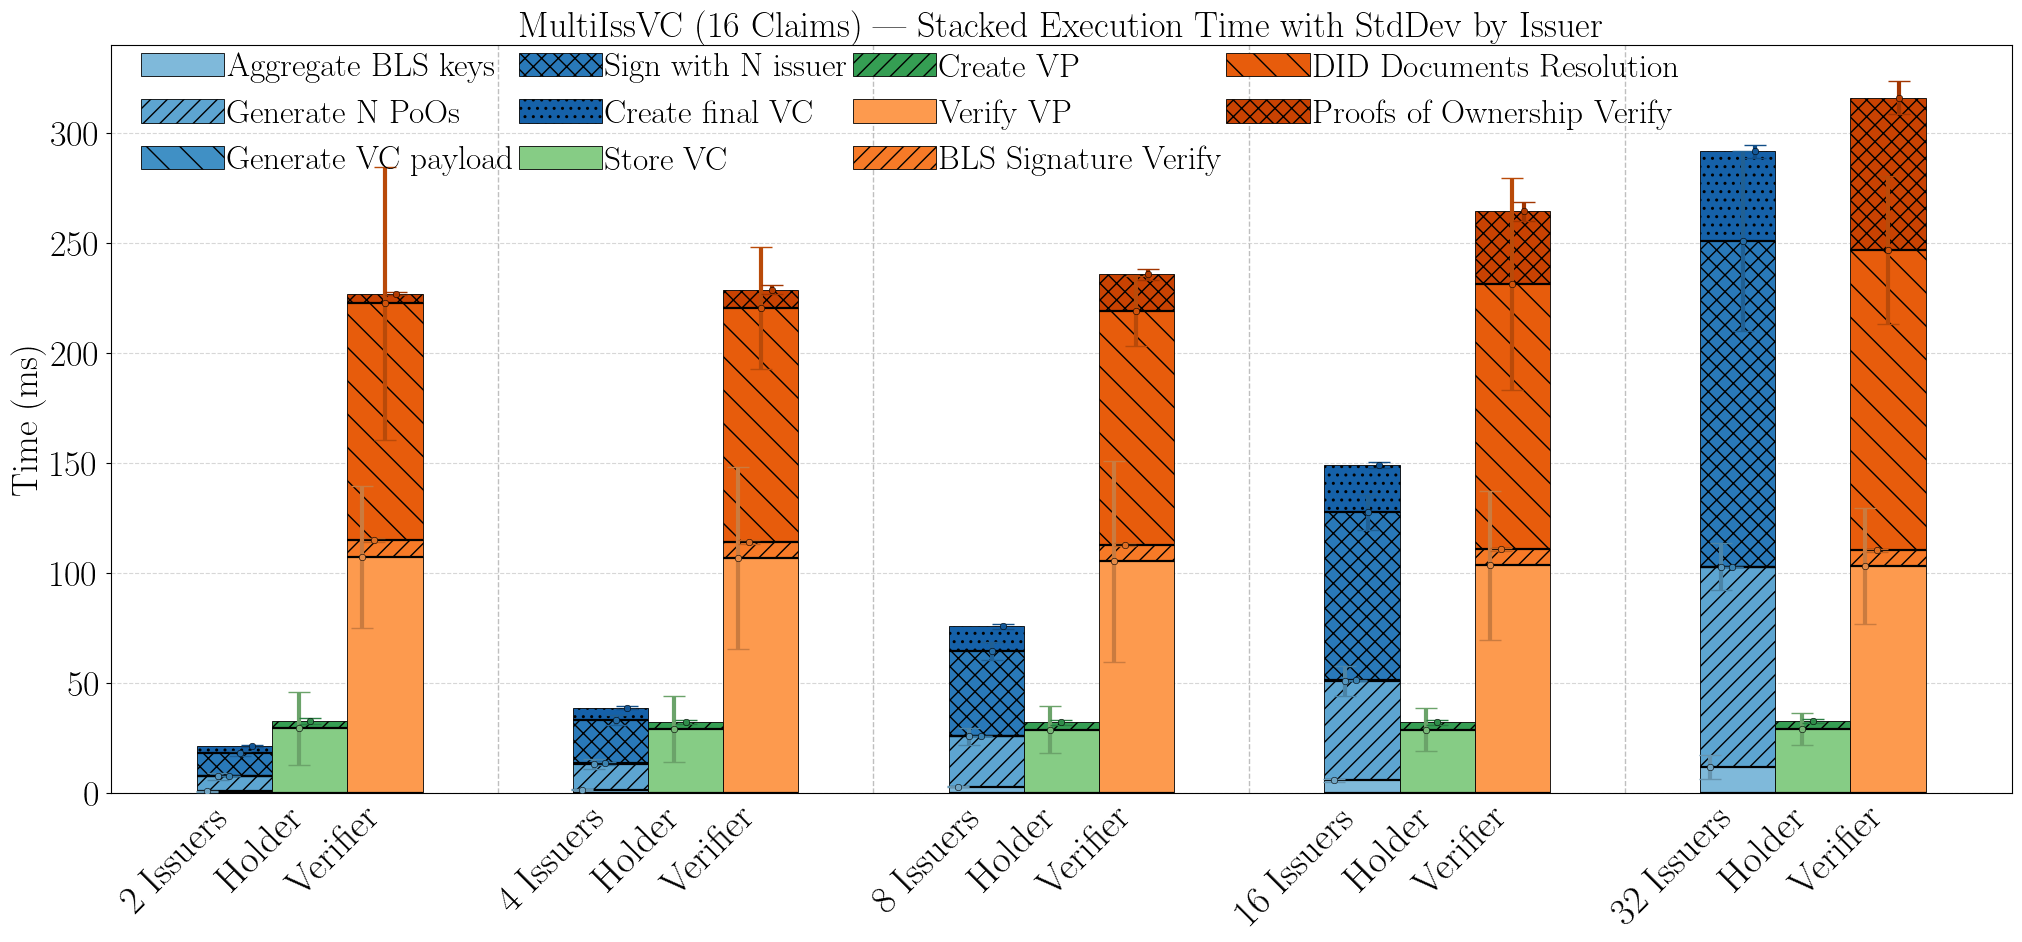

In [161]:
# --- Process and Plot MultiSignature Data (df_multi_16) ---
# =========================
# PREPROCESSING
# =========================

# Fix typos and apply user-requested name changes
df_multi_16["StepName"] = df_multi_16["StepName"].replace({
    "DID DocumentS Resolution": "DID Documents Resolution",
    "BLS Signature Verification": "BLS Signature Verify",
    "Proofs of Ownership Verification": "Proofs of Ownership Verify"
})

# Classify steps
df_multi_16["OperationGroup"] = df_multi_16["StepName"].apply(classify_step)

# Pivot avg and std_dev tables
avg_df = (
    df_multi_16
    .pivot_table(index="Issuers", columns="StepName", values="avg_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

std_df = (
    df_multi_16
    .pivot_table(index="Issuers", columns="StepName", values="std_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

# =========================
# GROUPING
# =========================

grouped_steps_multi = {
    "Issuing": [s for s in common_group1_steps if s in avg_df.columns],
    "Store & Present": [s for s in common_group2_steps if s in avg_df.columns],
    "Verification": [s for s in common_group3_steps if s in avg_df.columns]
}

# =========================
# PLOTTING
# =========================

x_multi = np.arange(len(avg_df.index))

fig, ax = plt.subplots(figsize=(20.8, 10))

for i, (group_label, steps) in enumerate(grouped_steps_multi.items()):
    bottom = np.zeros(len(avg_df))
    offset = (i - 1) * bar_width
    cmap = actor_colormaps[group_label]
    n_steps = max(1, len(steps))

    for j, step in enumerate(steps):
        if step not in avg_df.columns:
            continue

        values = avg_df[step].values
        errors = std_df[step].values

        color = cmap(0.45 + 0.45 * (j / n_steps))
        hatch = step_hatches[j % len(step_hatches)]

        bars = ax.bar(
            x_multi + offset,
            values,
            bottom=bottom,
            width=bar_width,
            label=step,
            color=color,
            edgecolor="black",
            linewidth=0.6,
            hatch=hatch,
            zorder=3
        )

        # Highlight bar start
        for b in bars:
            ax.hlines(
                y=b.get_y(),
                xmin=b.get_x(),
                xmax=b.get_x() + b.get_width(),
                colors="black",
                linewidth=1.6,
                zorder=4
            )

        # StdDev error bars + dot at center
        for xi, btm, val, err in zip(x_multi, bottom, values, errors):
            x_err = xi + offset + (j - n_steps / 2) * ci_offset
            y_center = btm + val

            ax.errorbar(
                x_err,
                y_center,
                yerr=err,
                ecolor=darken(color, 0.8),
                capsize=8,
                fmt="none",
                elinewidth=3,
                zorder=5
            )

            ax.scatter(
                x_err,
                y_center,
                s=22,
                color=darken(color, 0.9),
                edgecolor="black",
                linewidth=0.4,
                zorder=6
            )

        bottom += values

# =========================
# CUSTOM X-AXIS
# =========================

ax.set_xticks([])
plt.subplots_adjust(bottom=0.18) # Increased bottom margin for rotated labels
trans = ax.get_xaxis_transform()

# Define offsets for the three labels per group
offsets = [-bar_width, 0.0, bar_width]

for i, xi in enumerate(x_multi):
    issuer_num_str = avg_df.index.astype(str)[i] # Get the current issuer number as string

    # Dynamically create the list of texts for this x_multi position
    current_x_labels = [issuer_num_str + " Issuers", "Holder", "Verifier"]

    for actor_text, off in zip(current_x_labels, offsets):
        ax.text(
            xi + off, -0.01,
            actor_text,
            transform=trans,
            ha="right", va="top", # Keep alignment and rotation as before for all three
            rotation=45,
            fontsize=x_axis_label_fontsize
        )

# Remove the general "Number of Issuers" xlabel as the numbers are now integrated
ax.set_xlabel("")

# =========================
# VERTICAL SEPARATORS
# =========================

for xi in x_multi[:-1]:
    ax.axvline(
        xi + 0.5,
        color="gray",
        linestyle="--",
        linewidth=1,
        alpha=0.5,
        zorder=1
    )

# =========================
# FINAL COSMETICS
# =========================

ax.set_ylabel("Time (ms)")
ax.set_title("MultiIssVC (16 Claims) — Stacked Execution Time with StdDev by Issuer")

ax.legend(
    loc="upper left",
    bbox_to_anchor=(0.0, 1.030),
    ncol=4,
    columnspacing=0.1,
    handlelength=2.5,
    handletextpad=0.1,
    frameon=False
)


ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)

plt.tight_layout()
plt.savefig('multiissvc_16_claims.pdf', format='pdf') # Save as PDF
plt.show()

### JwtProof2020 (16 Claims) Plot

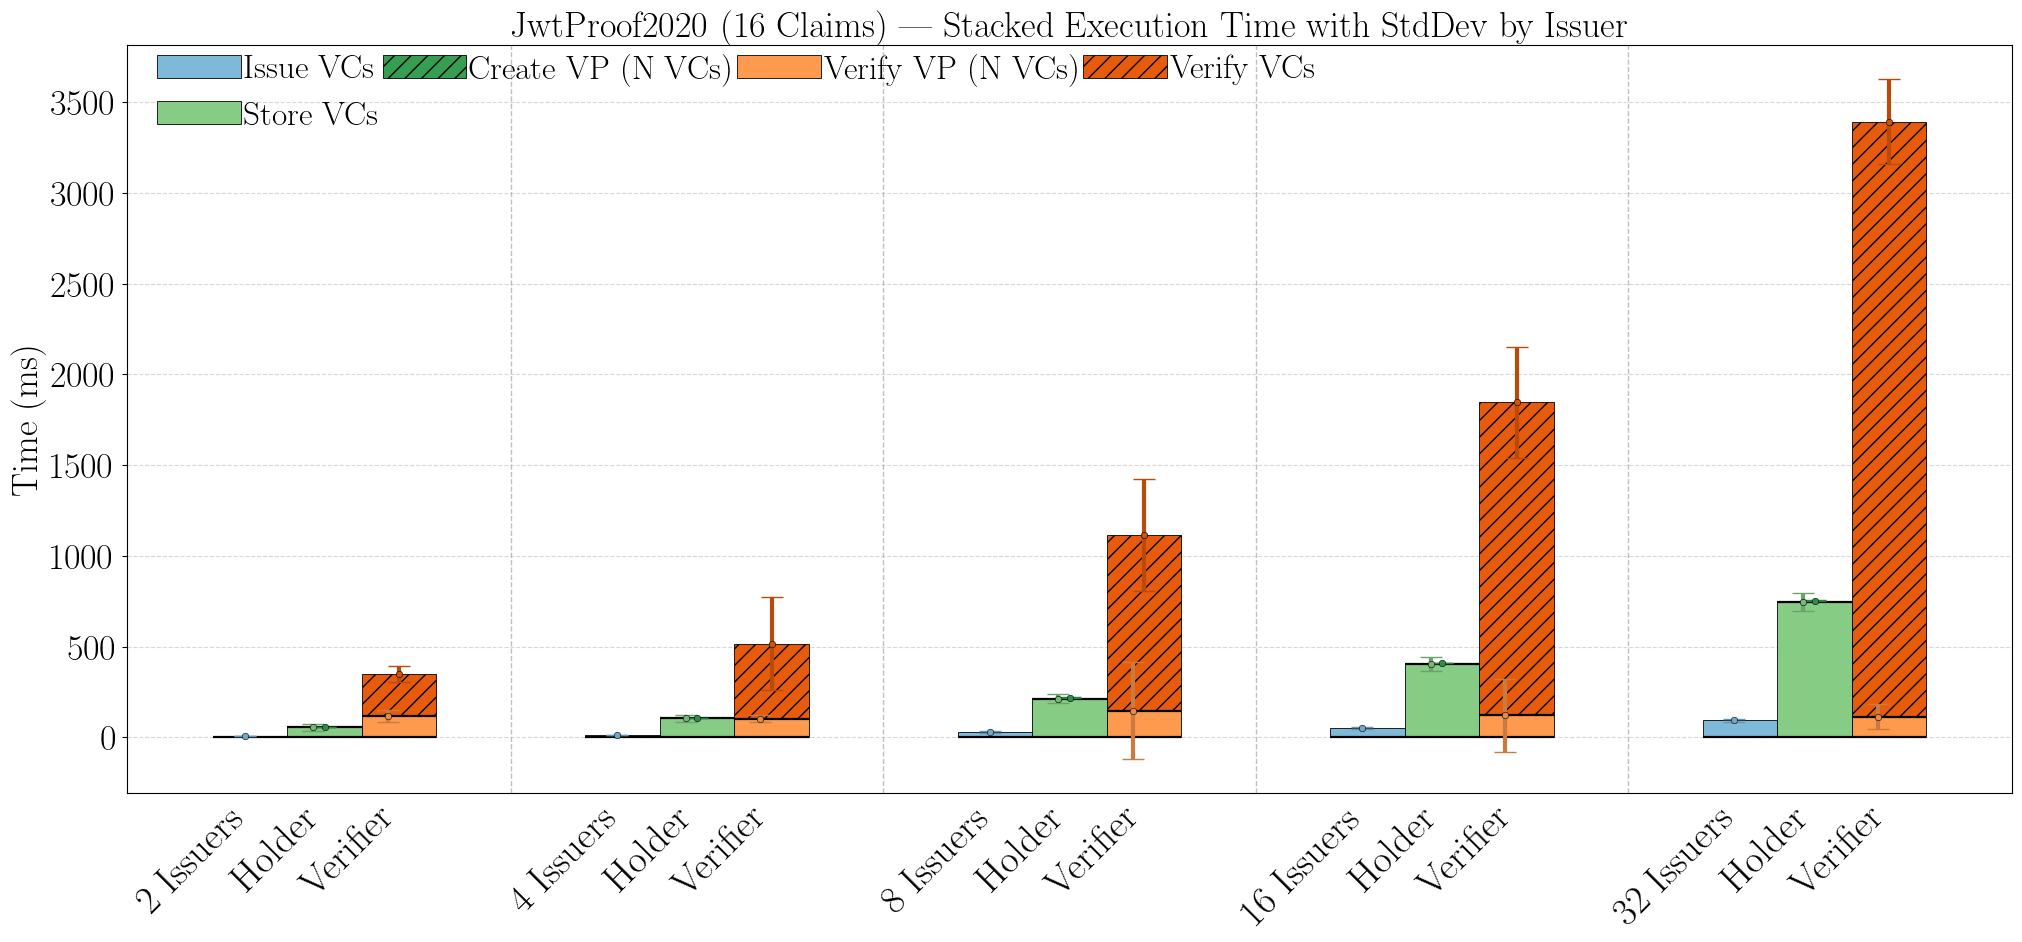

In [162]:
# --- Process and Plot JwtProof2020 Data (df_jwt_16) ---

# =========================
# PREPROCESSING
# =========================

df_jwt_16["OperationGroup"] = df_jwt_16["StepName"].apply(classify_step)

# Pivot avg and std_dev tables
avg_df = (
    df_jwt_16
    .pivot_table(index="Issuers", columns="StepName", values="avg_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

std_df = (
    df_jwt_16
    .pivot_table(index="Issuers", columns="StepName", values="std_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

# =========================
# GROUPING
# =========================

grouped_steps_jwt = {
    "Issuing": [s for s in common_group1_steps if s in avg_df.columns],
    "Store & Present": [s for s in common_group2_steps if s in avg_df.columns],
    "Verification": [s for s in common_group3_steps if s in avg_df.columns]
}

# =========================
# PLOTTING
# =========================

x = np.arange(len(avg_df.index))

fig, ax = plt.subplots(figsize=(20.8, 10))

for i, (group_label, steps) in enumerate(grouped_steps_jwt.items()):
    bottom = np.zeros(len(avg_df))
    offset = (i - 1) * bar_width
    cmap = actor_colormaps[group_label]
    n_steps = max(1, len(steps))

    for j, step in enumerate(steps):
        if step not in avg_df.columns:
            continue

        values = avg_df[step].values
        errors = std_df[step].values

        color = cmap(0.45 + 0.45 * (j / n_steps))
        hatch = step_hatches[j % len(step_hatches)]

        bars = ax.bar(
            x + offset,
            values,
            bottom=bottom,
            width=bar_width,
            label=step,
            color=color,
            edgecolor="black",
            linewidth=0.6,
            hatch=hatch,
            zorder=3
        )

        # Highlight bar start
        for b in bars:
            ax.hlines(
                y=b.get_y(),
                xmin=b.get_x(),
                xmax=b.get_x() + b.get_width(),
                colors="black",
                linewidth=1.6,
                zorder=4
            )

        # StdDev error bars + dot at center
        for xi, btm, val, err in zip(x, bottom, values, errors):
            x_err = xi + offset + (j - n_steps / 2) * ci_offset
            y_center = btm + val

            ax.errorbar(
                x_err,
                y_center,
                yerr=err,
                ecolor=darken(color, 0.8),
                capsize=8,
                fmt="none",
                elinewidth=3,
                zorder=5
            )

            ax.scatter(
                x_err,
                y_center,
                s=22,
                color=darken(color, 0.9),
                edgecolor="black",
                linewidth=0.4,
                zorder=6
            )

        bottom += values

# =========================
# CUSTOM X-AXIS (MultiSignature STYLE)
# =========================

ax.set_xticks([])
plt.subplots_adjust(bottom=0.18)
trans = ax.get_xaxis_transform()

offsets = [-bar_width, 0.0, bar_width]

for i, xi in enumerate(x):
    issuer_num_str = avg_df.index.astype(str)[i]

    current_x_labels = [
        issuer_num_str + " Issuers",
        "Holder",
        "Verifier"
    ]

    for actor_text, off in zip(current_x_labels, offsets):
        ax.text(
            xi + off, -0.01,
            actor_text,
            transform=trans,
            ha="right",
            va="top",
            rotation=45,
            fontsize=x_axis_label_fontsize        )

ax.set_xlabel("")

# =========================
# VERTICAL SEPARATORS
# =========================

for xi in x[:-1]:
    ax.axvline(
        xi + 0.5,
        color="gray",
        linestyle="--",
        linewidth=1,
        alpha=0.5,
        zorder=1
    )

# =========================
# FINAL COSMETICS
# =========================

ax.set_ylabel("Time (ms)")
ax.set_title("JwtProof2020 (16 Claims) — Stacked Execution Time with StdDev by Issuer")

ax.legend(
    loc="upper left",
     bbox_to_anchor=(0.0, 1.030),
    ncol=4,
    columnspacing=0.1,
    handlelength=2.5,
    handletextpad=0.1,
    frameon=False
)

ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)

plt.tight_layout()
plt.savefig('jwtproof2020_16_claims.pdf', format='pdf') # Save as PDF
plt.show()

### EIP712 (16 Claims) Plot

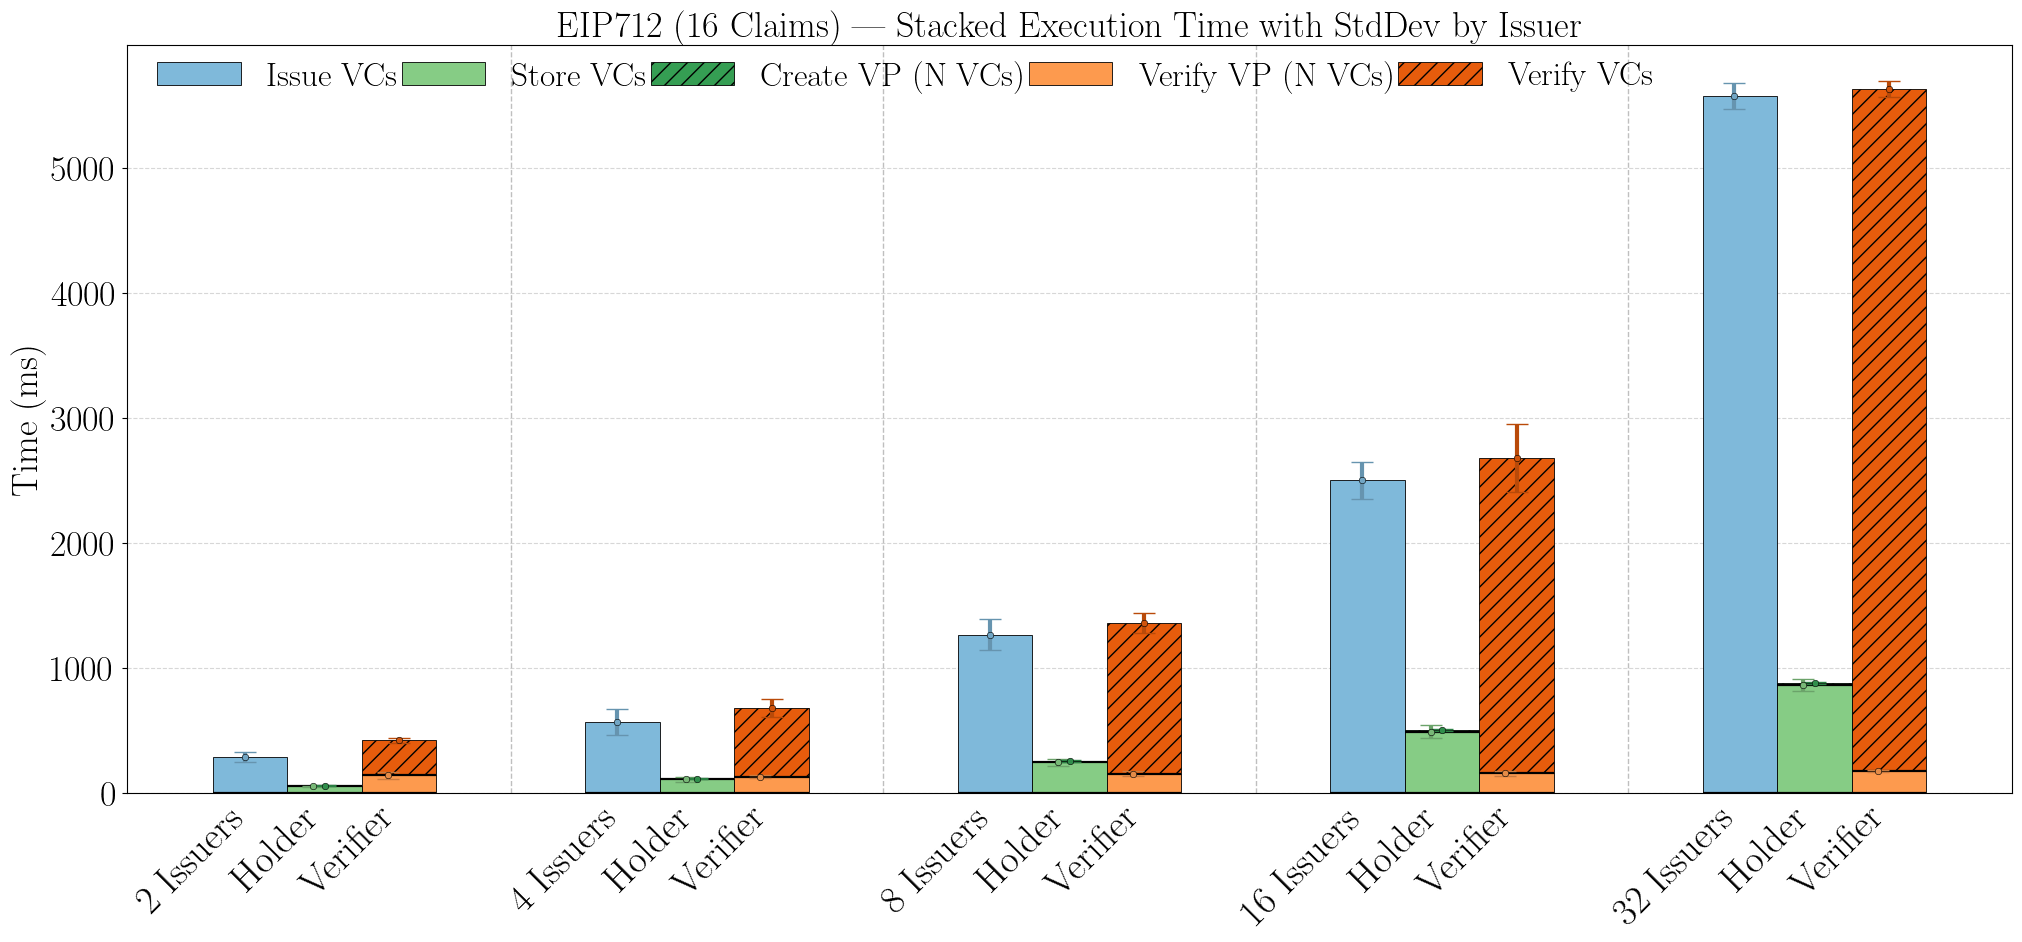

In [163]:
# --- Process and Plot EIP712 Data (df_eip_16) ---

# =========================
# PREPROCESSING
# =========================

df_eip_16["OperationGroup"] = df_eip_16["StepName"].apply(classify_step)

# Pivot avg and std_dev tables
avg_df = (
    df_eip_16
    .pivot_table(index="Issuers", columns="StepName", values="avg_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

std_df = (
    df_eip_16
    .pivot_table(index="Issuers", columns="StepName", values="std_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

# =========================
# GROUPING
# =========================

grouped_steps_eip = {
    "Issuing": [s for s in common_group1_steps if s in avg_df.columns],
    "Store & Present": [s for s in common_group2_steps if s in avg_df.columns],
    "Verification": [s for s in common_group3_steps if s in avg_df.columns]
}

# =========================
# PLOTTING
# =========================

x = np.arange(len(avg_df.index))

fig, ax = plt.subplots(figsize=(20.8, 10)) # Reverted figsize to match other plots

for i, (group_label, steps) in enumerate(grouped_steps_eip.items()):
    bottom = np.zeros(len(avg_df))
    offset = (i - 1) * bar_width
    cmap = actor_colormaps[group_label]
    n_steps = max(1, len(steps))

    for j, step in enumerate(steps):
        if step not in avg_df.columns:
            continue

        values = avg_df[step].values
        errors = std_df[step].values

        color = cmap(0.45 + 0.45 * (j / n_steps))
        hatch = step_hatches[j % len(step_hatches)]

        bars = ax.bar(
            x + offset,
            values,
            bottom=bottom,
            width=bar_width,
            label=step,
            color=color,
            edgecolor="black",
            linewidth=0.6,
            hatch=hatch,
            zorder=3
        )

        # Highlight bar start
        for b in bars:
            ax.hlines(
                y=b.get_y(),
                xmin=b.get_x(),
                xmax=b.get_x() + b.get_width(),
                colors="black",
                linewidth=1.6,
                zorder=4
            )

        # StdDev error bars + dot at center
        for xi, btm, val, err in zip(x, bottom, values, errors):
            x_err = xi + offset + (j - n_steps / 2) * ci_offset
            y_center = btm + val

            ax.errorbar(
                x_err,
                y_center,
                yerr=err,
                ecolor=darken(color, 0.8),
                capsize=8,
                fmt="none",
                elinewidth=3,
                zorder=5
            )

            ax.scatter(
                x_err,
                y_center,
                s=22,
                color=darken(color, 0.9),
                edgecolor="black",
                linewidth=0.4,
                zorder=6
            )

        bottom += values

# =========================
# CUSTOM X-AXIS
# =========================

ax.set_xticks([])
plt.subplots_adjust(bottom=0.18) # Increased bottom margin for rotated labels
trans = ax.get_xaxis_transform()

# Define offsets for the three labels per group
offsets = [-bar_width, 0.0, bar_width]

for i, xi in enumerate(x):
    issuer_num_str = avg_df.index.astype(str)[i] # Get the current issuer number as string

    # Dynamically create the list of texts for this x_multi position
    current_x_labels = [issuer_num_str + " Issuers", "Holder", "Verifier"]

    for actor_text, off in zip(current_x_labels, offsets):
        ax.text(
            xi + off, -0.01,
            actor_text,
            transform=trans,
            ha="right", va="top", # Keep alignment and rotation as before for all three
            rotation=45,
            fontsize=x_axis_label_fontsize)

# Remove the general "Number of Issuers" xlabel as the numbers are now integrated
ax.set_xlabel("")

# =========================
# VERTICAL SEPARATORS
# =========================

for xi in x[:-1]:
    ax.axvline(
        xi + 0.5,
        color="gray",
        linestyle="--",
        linewidth=1,
        alpha=0.5,
        zorder=1
    )

# =========================
# FINAL COSMETICS
# =========================

ax.set_ylabel("Time (ms)")
ax.set_title("EIP712 (16 Claims) — Stacked Execution Time with StdDev by Issuer")

ax.legend(
    **legend_params # Use global legend parameters
)

ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)

plt.tight_layout()
plt.savefig('eip712_16_claims.pdf', format='pdf') # Save as PDF
plt.show()

## Large Size VC (128 Claims)

### JwtProof2020 (128 Claims) Plot

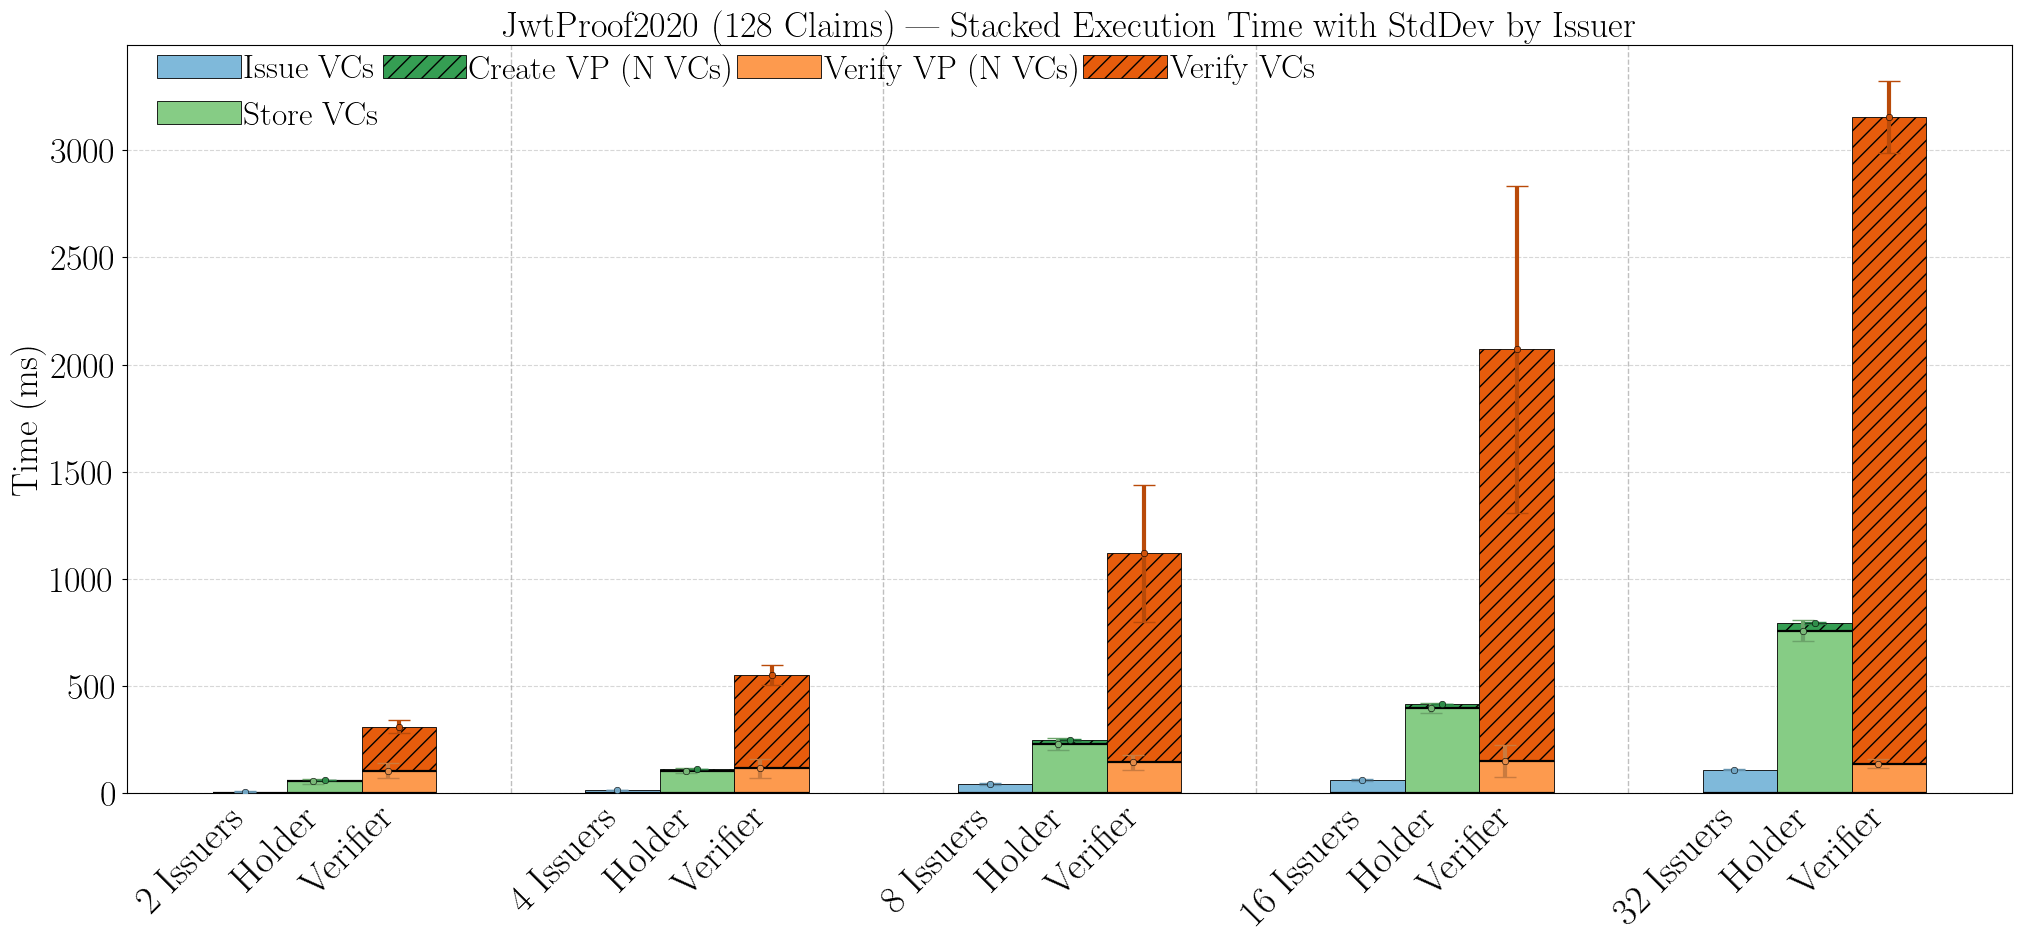

In [164]:
# --- Process and Plot JwtProof2020 Data (df_jwt_128) ---

# =========================
# PREPROCESSING
# =========================

df_jwt_128["OperationGroup"] = df_jwt_128["StepName"].apply(classify_step)

# Pivot avg and std_dev tables
avg_df = (
    df_jwt_128
    .pivot_table(index="Issuers", columns="StepName", values="avg_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

std_df = (
    df_jwt_128
    .pivot_table(index="Issuers", columns="StepName", values="std_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

# =========================
# GROUPING
# =========================

grouped_steps_jwt = {
    "Issuing": [s for s in common_group1_steps if s in avg_df.columns],
    "Store & Present": [s for s in common_group2_steps if s in avg_df.columns],
    "Verification": [s for s in common_group3_steps if s in avg_df.columns]
}

# =========================
# PLOTTING
# =========================

x = np.arange(len(avg_df.index))

fig, ax = plt.subplots(figsize=(20.8, 10))

for i, (group_label, steps) in enumerate(grouped_steps_jwt.items()):
    bottom = np.zeros(len(avg_df))
    offset = (i - 1) * bar_width
    cmap = actor_colormaps[group_label]
    n_steps = max(1, len(steps))

    for j, step in enumerate(steps):
        if step not in avg_df.columns:
            continue

        values = avg_df[step].values
        errors = std_df[step].values

        color = cmap(0.45 + 0.45 * (j / n_steps))
        hatch = step_hatches[j % len(step_hatches)]

        bars = ax.bar(
            x + offset,
            values,
            bottom=bottom,
            width=bar_width,
            label=step,
            color=color,
            edgecolor="black",
            linewidth=0.6,
            hatch=hatch,
            zorder=3
        )

        # Highlight bar start
        for b in bars:
            ax.hlines(
                y=b.get_y(),
                xmin=b.get_x(),
                xmax=b.get_x() + b.get_width(),
                colors="black",
                linewidth=1.6,
                zorder=4
            )

        # StdDev error bars + dot at center
        for xi, btm, val, err in zip(x, bottom, values, errors):
            x_err = xi + offset + (j - n_steps / 2) * ci_offset
            y_center = btm + val

            ax.errorbar(
                x_err,
                y_center,
                yerr=err,
                ecolor=darken(color, 0.8),
                capsize=8,
                fmt="none",
                elinewidth=3,
                zorder=5
            )

            ax.scatter(
                x_err,
                y_center,
                s=22,
                color=darken(color, 0.9),
                edgecolor="black",
                linewidth=0.4,
                zorder=6
            )

        bottom += values

# =========================
# CUSTOM X-AXIS (MultiSignature STYLE)
# =========================

ax.set_xticks([])
plt.subplots_adjust(bottom=0.18)
trans = ax.get_xaxis_transform()

offsets = [-bar_width, 0.0, bar_width]

for i, xi in enumerate(x):
    issuer_num_str = avg_df.index.astype(str)[i]

    current_x_labels = [
        issuer_num_str + " Issuers",
        "Holder",
        "Verifier"
    ]

    for actor_text, off in zip(current_x_labels, offsets):
        ax.text(
            xi + off, -0.01,
            actor_text,
            transform=trans,
            ha="right",
            va="top",
            rotation=45,
            fontsize=x_axis_label_fontsize        )

ax.set_xlabel("")

# =========================
# VERTICAL SEPARATORS
# =========================

for xi in x[:-1]:
    ax.axvline(
        xi + 0.5,
        color="gray",
        linestyle="--",
        linewidth=1,
        alpha=0.5,
        zorder=1
    )

# =========================
# FINAL COSMETICS
# =========================

ax.set_ylabel("Time (ms)")
ax.set_title("JwtProof2020 (128 Claims) — Stacked Execution Time with StdDev by Issuer")

ax.legend(
    loc="upper left",
     bbox_to_anchor=(0.0, 1.030),
    ncol=4,
    columnspacing=0.1,
    handlelength=2.5,
    handletextpad=0.1,
    frameon=False
)

ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)

plt.tight_layout()
plt.savefig('jwtproof2020_128_claims.pdf', format='pdf') # Save as PDF
plt.show()

### EIP712 (128 Claims) Plot

### MultiSignature (128 Claims) Plot

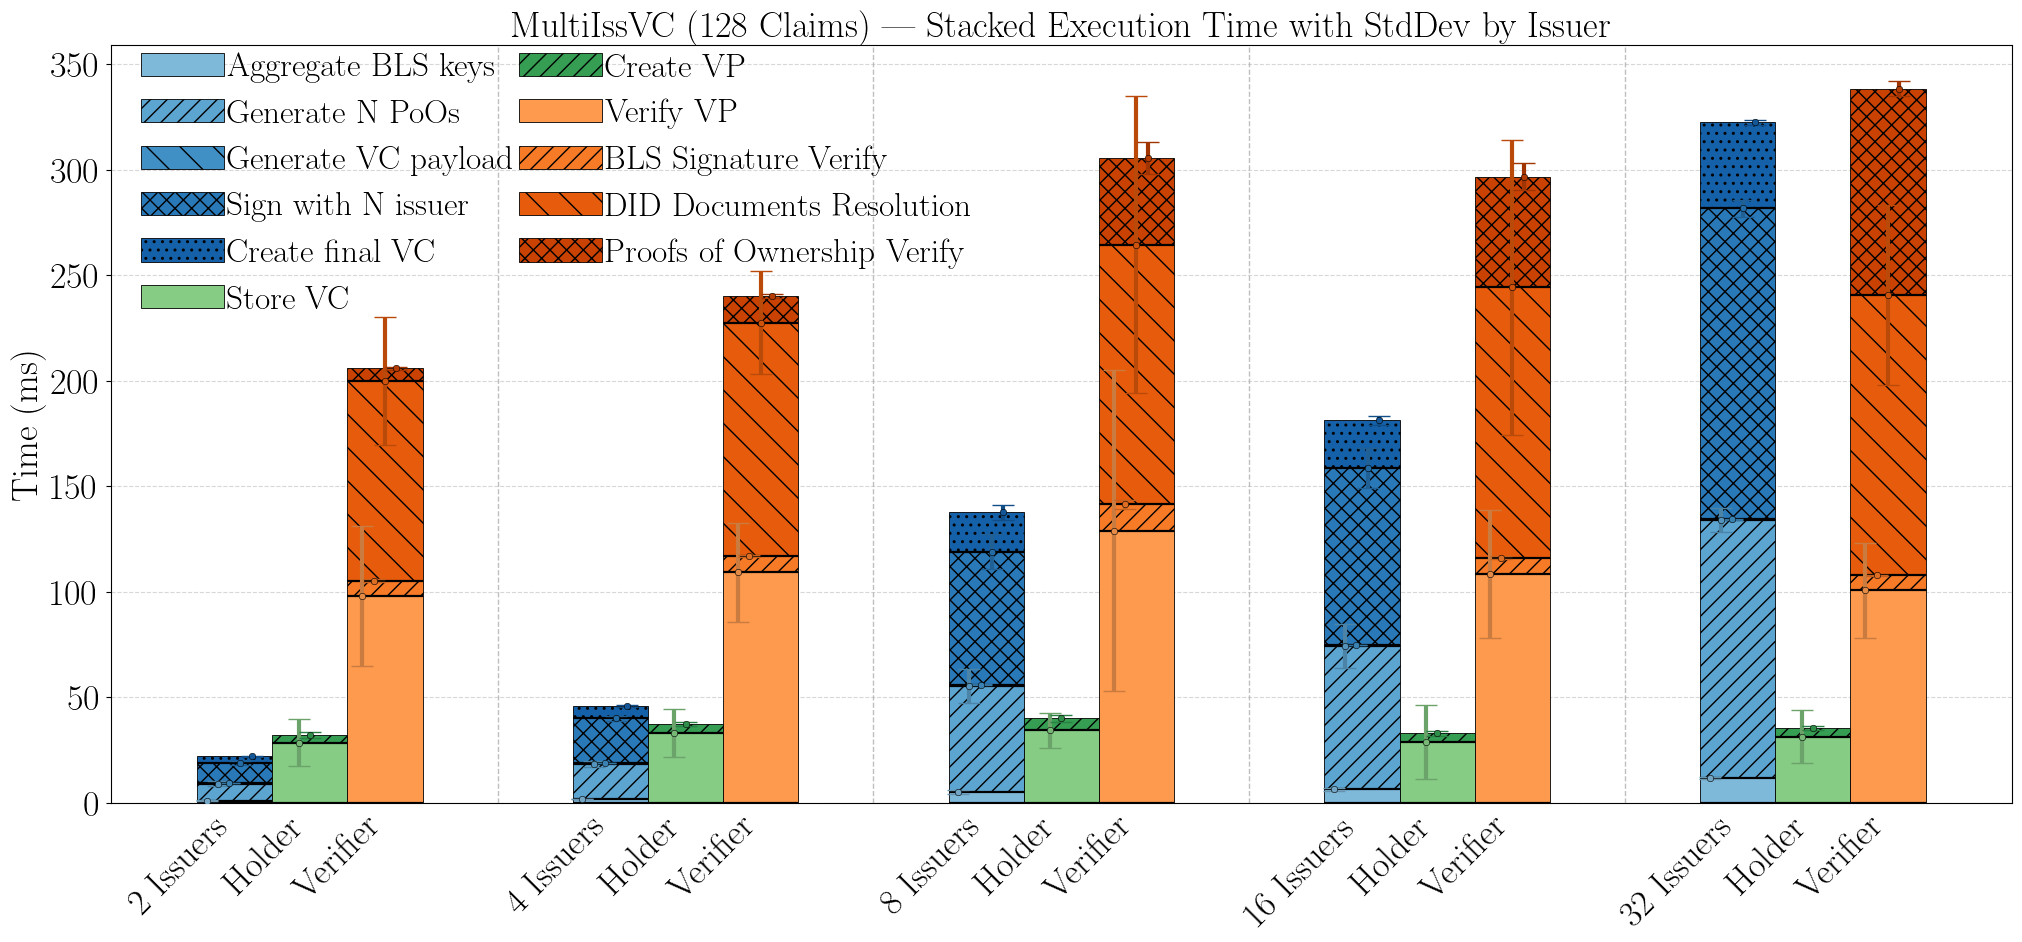

In [156]:
# --- Process and Plot MultiSignature Data (df_multi_128) ---

# =========================
# PREPROCESSING
# =========================

# Fix typos and apply user-requested name changes
df_multi_128["StepName"] = df_multi_128["StepName"].replace({
    "DID DocumentS Resolution": "DID Documents Resolution",
    "BLS Signature Verification": "BLS Signature Verify",
    "Proofs of Ownership Verification": "Proofs of Ownership Verify"
})

# Classify steps
df_multi_128["OperationGroup"] = df_multi_128["StepName"].apply(classify_step)

# Pivot avg and std_dev tables
avg_df = (
    df_multi_128
    .pivot_table(index="Issuers", columns="StepName", values="avg_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

std_df = (
    df_multi_128
    .pivot_table(index="Issuers", columns="StepName", values="std_ms", aggfunc="mean")
    .fillna(0)
    .sort_index()
)

# =========================
# GROUPING
# =========================

grouped_steps_multi = {
    "Issuing": [s for s in common_group1_steps if s in avg_df.columns],
    "Store & Present": [s for s in common_group2_steps if s in avg_df.columns],
    "Verification": [s for s in common_group3_steps if s in avg_df.columns]
}

# Actor-based gradient colormaps
actor_colormaps = {
    "Issuing": plt.cm.Blues,
    "Store & Present": plt.cm.Greens,
    "Verification": plt.cm.Oranges
}

# STEP-level hatch patterns
step_hatches = ["", "//", "\\", "xx", "..", "++"]

# =========================
# PLOTTING
# =========================

x = np.arange(len(avg_df.index))
bar_width = 0.20
ci_offset = bar_width * 0.15

fig, ax = plt.subplots(figsize=(20.8, 10))

for i, (group_label, steps) in enumerate(grouped_steps_multi.items()):
    bottom = np.zeros(len(avg_df))
    offset = (i - 1) * bar_width
    cmap = actor_colormaps[group_label]
    n_steps = max(1, len(steps))

    for j, step in enumerate(steps):
        if step not in avg_df.columns:
            continue

        values = avg_df[step].values
        errors = std_df[step].values

        color = cmap(0.45 + 0.45 * (j / n_steps))
        hatch = step_hatches[j % len(step_hatches)]

        bars = ax.bar(
            x + offset,
            values,
            bottom=bottom,
            width=bar_width,
            label=step,
            color=color,
            edgecolor="black",
            linewidth=0.6,
            hatch=hatch,
            zorder=3
        )

        # Highlight bar start
        for b in bars:
            ax.hlines(
                y=b.get_y(),
                xmin=b.get_x(),
                xmax=b.get_x() + b.get_width(),
                colors="black",
                linewidth=1.6,
                zorder=4
            )

        # StdDev error bars + dot at center
        for xi, btm, val, err in zip(x, bottom, values, errors):
            x_err = xi + offset + (j - n_steps / 2) * ci_offset
            y_center = btm + val

            ax.errorbar(
                x_err,
                y_center,
                yerr=err,
                ecolor=darken(color, 0.8),
                capsize=8,
                fmt="none",
                elinewidth=3,
                zorder=5
            )

            ax.scatter(
                x_err,
                y_center,
                s=22,
                color=darken(color, 0.9),
                edgecolor="black",
                linewidth=0.4,
                zorder=6
            )

        bottom += values

# =========================
# CUSTOM X-AXIS (STYLE-LOCKED)
# =========================

ax.set_xticks([])
plt.subplots_adjust(bottom=0.18)
trans = ax.get_xaxis_transform()

offsets = [-bar_width, 0.0, bar_width]

for i, xi in enumerate(x):
    issuer_num_str = avg_df.index.astype(str)[i]

    current_x_labels = [
        issuer_num_str + " Issuers",
        "Holder",
        "Verifier"
    ]

    for actor_text, off in zip(current_x_labels, offsets):
        ax.text(
            xi + off, -0.01,
            actor_text,
            transform=trans,
            ha="right",
            va="top",
            rotation=45,
            fontsize=26
        )

ax.set_xlabel("")

# =========================
# VERTICAL GROUP SEPARATORS
# =========================

for xi in x[:-1]:
    ax.axvline(
        xi + 0.5,
        color="gray",
        linestyle="--",
        linewidth=1,
        alpha=0.5,
        zorder=1
    )

# =========================
# FINAL COSMETICS
# =========================

ax.set_ylabel("Time (ms)")
ax.set_title("MultiIssVC (128 Claims) — Stacked Execution Time with StdDev by Issuer")

ax.legend(
    loc="upper left",
     bbox_to_anchor=(0.0, 1.030),
    ncol=2,
    columnspacing=0.1,
    handlelength=2.5,
    handletextpad=0.1,
    frameon=False
)

ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)

plt.tight_layout()
plt.savefig('multiissvc_128_claims.pdf', format='PDF') # Save as PDF
plt.show()